<a href="https://colab.research.google.com/github/rhuancborges/praticas-programacaoMatematica/blob/main/problema3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Prática 2 (AP2)
### GCC118 - Programação Matemática


**Nome**: Rhuan Campideli Borges (202210075)

**Turma**: 10A





# Enunciado - Problema 3

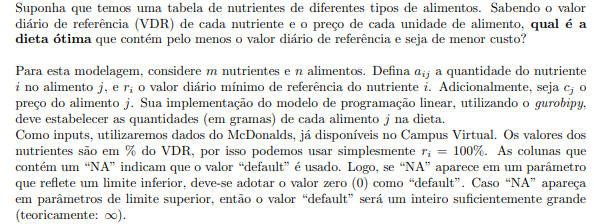

# 1 - Modelagem Matemática e resolução

## Dados
Para iniciar nossa modelagem, podemos retirar do enunciado do problema alguns dados importantes:

* $a_{ij}$ -> quantidade do nutriente i no alimento j (em %);
* $r_i$ -> valor diário mínimo de referência (VDR) do nutriente i (100%);
* $c_j$ -> preço do alimento j.

## Variáveis de decisão
As variáveis do problema (e também aquilo que queremos determinar) é a quantidade em gramas de cada alimento na dieta. Sendo assim, tem-se um vetor $x$ de $n$ variáveis.

### Tipo

As variáveis são contínuas, ou seja, $x \geq 0 $.

\\
## Objetivo e função
O objetivo do problema é minimizar o custo da dieta, respeitando os valores VDR. Sendo assim, devemos **minimizar** a seguinte função:

$$
f(x) = c^Tx = \sum_{j=1}^{n}c_jx_j
$$


## Restrições

As restrições do problema consiste em que, para todos os alimentos $j$, a quantidade consumida do nutriente $i$ deve atingir o valor mínimo $r_i$:

$$
\sum_{j=1}^{n}a_{ij}{x_j} \geq r_i, ∀i \in \{1,...,m\}
$$


## Instalação da biblioteca Gurobi

In [1]:
!pip install gurobipy

## Declaração do objeto que representa o modelo e importando dados

In [2]:
from gurobipy import Model, GRB
import pandas as pd
import numpy as np

# Criar o modelo
modelo = Model("dieta")

# Importando dados
nutrientes =  pd.read_csv('McDonalds-amnt.wsv', sep='\s+', comment='#').to_numpy()
custos =  pd.read_csv('McDonalds-food.wsv', sep='\s+', comment='#').to_numpy()
vdr =  pd.read_csv('McDonalds-nutr.wsv', sep='\s+', comment='#').to_numpy()

# Definindo variáveis
n = nutrientes.shape[0]
m = vdr.shape[0]


Restricted license - for non-production use only - expires 2026-11-23


## Variáveis de decisão

In [3]:
x = {}
for i in range(n):
  x[i] = modelo.addVar(name=nutrientes[i, 0], vtype=GRB.CONTINUOUS, lb=0)

## Função objetivo

In [4]:
modelo.setObjective(sum(custos[j, 1] * x[j] for j in range(n)), GRB.MINIMIZE)

## Restrições


In [5]:
for i in range(m):
  modelo.addConstr(sum((nutrientes[j][1+i])*x[j] for j in range(n)) >= vdr[i, 1], name=f"nutriente_{vdr[i,0]}")

## Resolvendo o problema

In [ ]:
modelo.optimize()

## Imprimindo as soluções do problema

In [7]:
if(modelo.status == GRB.OPTIMAL):
  for i in range(n):
    if(x[i].X > 0):
      print(f"{nutrientes[i, 0]}: {x[i].X}")
  print(f"Custo mínimo: {modelo.objVal}")

McDuplo: 5.045871559633028
Casquinha Baunilha: 2.293577981651376
Maçã: 3.2110091743119265
Custo mínimo: 24.31192660550459


## Análise de sensibilidade

In [8]:
print("\nIntervalos de Custos (Vetor de Custos):")
for variavel in modelo.getVars():
  print(f"Variável {variavel.VarName}:")
  print(f"  valor mínimo do custo (SAObjLow): {variavel.SAObjLow}")
  print(f"  valor máximo do custo (SAObjUp): {variavel.SAObjUp}")

print("\nIntervalos de Recursos (Vetor de Recursos):")
for restricao in modelo.getConstrs():
  print(f"Restrição {restricao.ConstrName}:")
  print(f"  valor mínimo do recurso (SARHSLow): {restricao.SARHSLow}")
  print(f"  valor máximo do recurso (SARHSUp): {restricao.SARHSUp}")
  print(f"  valor da variável dual associada: {restricao.Pi}")


Intervalos de Custos (Vetor de Custos):
Variável Big Mac:
  valor mínimo do custo (SAObjLow): 3.8954128440366977
  valor máximo do custo (SAObjUp): inf
Variável Big Tasty:
  valor mínimo do custo (SAObjLow): 6.279816513761467
  valor máximo do custo (SAObjUp): inf
Variável Quarterão com Queijo:
  valor mínimo do custo (SAObjLow): 5.077064220183487
  valor máximo do custo (SAObjUp): inf
Variável McNífico Bacon:
  valor mínimo do custo (SAObjLow): 5.4779816513761475
  valor máximo do custo (SAObjUp): inf
Variável Cheddar McMelt:
  valor mínimo do custo (SAObjLow): 4.676146788990826
  valor máximo do custo (SAObjUp): inf
Variável McFish:
  valor mínimo do custo (SAObjLow): 3.144036697247707
  valor máximo do custo (SAObjUp): inf
Variável McChicken:
  valor mínimo do custo (SAObjLow): 3.441284403669725
  valor máximo do custo (SAObjUp): inf
Variável Crispy Chicken:
  valor mínimo do custo (SAObjLow): 3.7724770642201837
  valor máximo do custo (SAObjUp): inf
Variável Chicken Grill:
  valor

O retorno dado pela análise de sensibilidade a respeito dos custos das variáveis apresenta valores **inf** para as variáveis não básicas, pois como apresentam valor 0, qualquer valor de custo não prejudica a função objetivo. Já para as variáveis básicas, a análise de sensibilidade retornou valores específicos para os limites inferior e superior para os custos de modo a manter a factibilidade do problema.

Em relação às restrições, existem muitas inativas, o que é evidenciado pelo valor zero da variável dual associada, bem como pela tendência do limite inferior do recurso a menos infinito, de modo que a soma das quantidades do nutriente $i$ nos alimentos sempre vai estar acima do valor do recurso, o que é diferente, por exemplo, da restrição **nutriente_Fibra** que possui um valor mínimo de recurso de 54.54, de modo que se o recurso for menor que tal valor, o problema passa à infactibilidade.

## 3 - Dieta Vegetariana

In [9]:
veg = modelo
y = veg.getVars();
for j in range(n):
  if(custos[j,4] == False):
    veg.addConstr(y[j] == 0)

In [10]:
veg.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 27 rows, 84 columns and 651 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
LP warm-start: use basis

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.4311927e+01   4.036697e+01   0.000000e+00      0s
      16    3.9634146e+01   0.000000e+00   0.000000e+00      0s

Solved in 16 iterations and 0.02 seconds (0.00 work units)
Optimal objective  3.963414634e+01


In [11]:
if(veg.status == GRB.OPTIMAL):
  for i in range(n):
    if(y[i].X > 0):
      print(f"{nutrientes[i, 0]}: {y[i].X}")
  print(f"Custo mínimo: {veg.objVal}")

Molho Salada Ranch: 7.317073170731708
Casquinha Baunilha: 13.658536585365857
Casquinha Chocolate: 2.19512195121951
Maçã: 4.878048780487806
Custo mínimo: 39.63414634146342


## 4 - Consumo único

In [12]:
uni = modelo
w = uni.getVars();
for j in range(n):
    uni.addConstr(w[j] <= 1)

In [ ]:
uni.optimize()

In [14]:
if(uni.status == GRB.OPTIMAL):
  for i in range(n):
    if(w[i].X > 0):
      print(f"{nutrientes[i, 0]}: {w[i].X}")
  print(f"Custo mínimo: {uni.objVal}")

Queijo Quente: 1.0
Premium Salad Crispy: 1.0
Molho Salada Caseiro: 1.0
Molho Salada Ranch: 1.0
McFritas grande: 1.0
McFritas média: 0.37815126050420167
Casquinha Baunilha: 1.0
Casquinha Chocolate: 1.0
Casquinha Mista: 1.0
ChocoMac Branco: 1.0
ChocoMac Preto: 1.0
McColosso Chocolate: 1.0
McColosso Doce de Leite: 1.0
Top Sundae Chocolate: 0.8571428571428571
Top Sundae Doce de Leite: 1.0
Top Sundae Morango: 1.0
McFlurry M&M e Choc. Branco: 1.0
Maçã: 1.0
Custo mínimo: 54.659243697479006
